In [1]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df=pd.read_csv('Ipl-clean-data2008-2023.csv')

In [7]:
df.head()

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        899 non-null    int64  
 1   season            899 non-null    float64
 2   id                899 non-null    int64  
 3   name              899 non-null    object 
 4   short_name        899 non-null    object 
 5   description       899 non-null    object 
 6   home_team         899 non-null    object 
 7   away_team         899 non-null    object 
 8   toss_won          899 non-null    object 
 9   decision          899 non-null    object 
 10  1st_inning_score  899 non-null    object 
 11  2nd_inning_score  899 non-null    object 
 12  winner            899 non-null    object 
 13  result            899 non-null    object 
 14  start_date        899 non-null    object 
 15  end_date          899 non-null    object 
 16  venue_id          899 non-null    int64  
 1

In [17]:
df.isnull().sum()

Unnamed: 0          0
season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
toss_won            0
decision            0
1st_inning_score    0
2nd_inning_score    0
winner              0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
home_captain        0
away_captain        0
pom                 0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
dtype: int64

In [19]:
df=df.drop(columns=['Unnamed: 0'])

df['start_date']=pd.to_datetime(df['start_date'],errors='coerce')
df['end_date']=pd.to_datetime(df['end_date'],errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   season            899 non-null    float64            
 1   id                899 non-null    int64              
 2   name              899 non-null    object             
 3   short_name        899 non-null    object             
 4   description       899 non-null    object             
 5   home_team         899 non-null    object             
 6   away_team         899 non-null    object             
 7   toss_won          899 non-null    object             
 8   decision          899 non-null    object             
 9   1st_inning_score  899 non-null    object             
 10  2nd_inning_score  899 non-null    object             
 11  winner            899 non-null    object             
 12  result            899 non-null    object             
 13  start

In [23]:
df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200/5,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176/8,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,223/3,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,187/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi


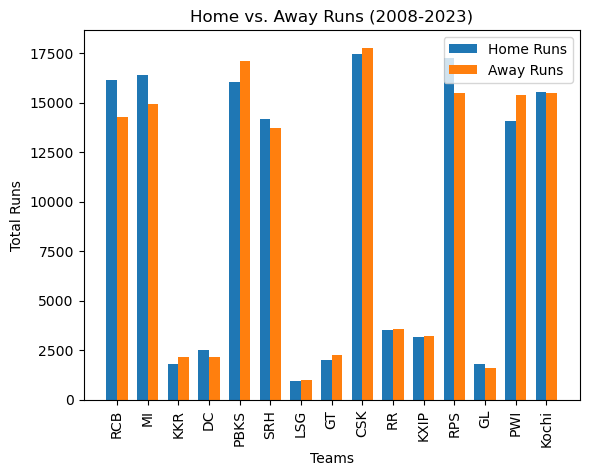

In [27]:
import matplotlib.pyplot as plt
import numpy as np

teams = df['home_team'].unique()
home_runs = df.groupby('home_team')['home_runs'].sum()
away_runs = df.groupby('away_team')['away_runs'].sum()

bar_width = 0.35
index = np.arange(len(teams))

fig, ax = plt.subplots()
bar1 = ax.bar(index, home_runs, bar_width, label='Home Runs')
bar2 = ax.bar(index + bar_width, away_runs, bar_width, label='Away Runs')

ax.set_xlabel('Teams')
ax.set_ylabel('Total Runs')
ax.set_title('Home vs. Away Runs (2008-2023)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(teams, rotation=90)
ax.legend()

plt.show()

In [1]:
import pandas as pd

data = {
    'Player': ['V Kohli', 'S Dhawan', 'DA Warner', 'RG Sharma', 'SK Raina', 'AB de Villiers', 'MS Dhoni', 'CH Gayle', 'RV Uthappa', 'KD Karthik', 'AM Rahane', 'AT Rayudu', 'G Gambhir', 'KL Rahul', 'F du Plessis'],
    'Span': ['2008-2023', '2008-2023', '2009-2023', '2008-2023', '2008-2021', '2008-2021', '2008-2023', '2009-2021', '2008-2022', '2008-2023', '2008-2023', '2010-2023', '2008-2018', '2013-2023', '2012-2023'],
    'Mat': [237, 217, 176, 243, 205, 184, 250, 142, 205, 242, 172, 204, 154, 118, 130],
    'Inns': [229, 216, 176, 238, 200, 170, 218, 141, 197, 221, 159, 187, 152, 109, 123],
    'NO': [34, 29, 22, 28, 30, 40, 87, 16, 17, 46, 17, 33, 16, 20, 11],
    'Runs': [7263, 6617, 6397, 6211, 5528, 5162, 5082, 4965, 4952, 4516, 4400, 4348, 4217, 4163, 4133],
    'HS': ['113', '106*', '126', '109*', '100*', '133*', '84*', '175*', '88', '97*', '105*', '100*', '93', '132*', '96'],
    'Ave': [37.24, 35.38, 41.53, 29.57, 32.51, 39.7, 38.79, 39.72, 27.51, 25.8, 30.98, 28.23, 31, 46.77, 36.9],
    'BF': [5586, 5203, 4572, 4776, 4043, 3403, 3739, 3333, 3799, 3403, 3565, 3409, 3404, 3097, 3081],
    'SR': [130.02, 127.17, 139.91, 130.04, 136.73, 151.68, 135.91, 148.96, 130.35, 132.7, 123.42, 127.54, 123.88, 134.42, 134.14],
    '100': [7, 2, 4, 1, 1, 3, 0, 6, 0, 0, 2, 1, 0, 4, 0],
    '50': [50, 50, 61, 42, 39, 40, 24, 31, 27, 20, 30, 22, 36, 33, 33],
    '0': [10, 11, 11, 16, 8, 10, 5, 8, 8, 17, 13, 14, 12, 4, 7],
    '4s': [643, 750, 646, 554, 506, 413, 349, 404, 481, 439, 455, 359, 492, 355, 374],
    '6s': [234, 148, 226, 257, 203, 251, 239, 357, 182, 139, 96, 173, 59, 168, 145]
}


df1 = pd.DataFrame(data)

df1.to_csv('individual_player_records.csv',index = False)

In [5]:
df1

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234
1,S Dhawan,2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148
2,DA Warner,2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226
3,RG Sharma,2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
5,AB de Villiers,2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251
6,MS Dhoni,2008-2023,250,218,87,5082,84*,38.79,3739,135.91,0,24,5,349,239
7,CH Gayle,2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357
8,RV Uthappa,2008-2022,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182
9,KD Karthik,2008-2023,242,221,46,4516,97*,25.80,3403,132.70,0,20,17,439,139
